In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('company_rating_data_clean.csv')

In [3]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Age,python_yn,sql_yn,tableau_yn,spark_yn,aws_yn,excel_yn
0,Junior Data Scientist,ABOUT YOURSELF\r\nYou are a data-driven proble...,2.9,Juris Technologies,Kuala Lumpur,51 to 200 Employees,1997,Company - Private,Enterprise Software & Network Solutions,Information Technology,$5 to $10 million (USD),23,1,1,0,0,0,0
1,"Associate - Data & Analytics, Technology Consu...",EY DnA is the\r\ndata and advanced analytics c...,3.8,EY,Kuala Lumpur,10000+ Employees,1989,Company - Private,Accounting,Accounting & Legal,$10+ billion (USD),31,1,1,1,0,0,1
2,"Scientist 1, Data Science","SCIENTIST 1, DATA SCIENCE\r\n\r\nPetaling Jaya...",3.5,Western Digital,Petaling Jaya,10000+ Employees,1970,Company - Public,Computer Hardware & Software,Information Technology,$10+ billion (USD),50,1,1,0,0,1,0
3,Data Scientist,About You\r\n\r\nRinggitPlus is looking for a ...,4.0,RinggitPlus.com,Kuala Lumpur,51 to 200 Employees,2013,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,7,1,1,1,0,0,1
4,Data Scientist,Location: Kuala Lumpur.\r\n\r\nClient's Profil...,5.0,CareerMaster Sdn Bhd,Kuala Lumpur,1 to 50 Employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1,1,1,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Age', 'python_yn', 'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn',
       'excel_yn'],
      dtype='object')

In [5]:
# Job title and seniority
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist' 
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data engineer     302
analyst           227
na                 41
data scientist     32
manager             6
mle                 2
director            1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        407
senior    203
jr          1
Name: seniority, dtype: int64

In [9]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2188
1      4618
2      3434
3      3012
4      1678
       ... 
606    2089
607    1905
608    1071
609    8184
610    2104
Name: desc_len, Length: 611, dtype: int64

In [10]:
df.describe()

,Rating,Founded,Age,python_yn,sql_yn,tableau_yn,spark_yn,aws_yn,excel_yn,desc_len
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,3.655483,1517.582651,35.801964,0.472995,0.662848,0.188216,0.266776,0.351882,0.479542,2380.409165
std,0.519598,833.443999,45.538509,0.499679,0.473125,0.391205,0.442637,0.477949,0.499991,1549.170763
min,2.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,457.000000
25%,3.300000,1865.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1402.000000
50%,3.700000,1984.000000,21.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2089.000000
75%,3.900000,2001.000000,36.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2502.500000
max,5.000000,2015.000000,155.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8184.000000


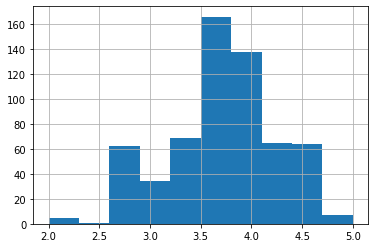

In [11]:
df.Rating.hist()

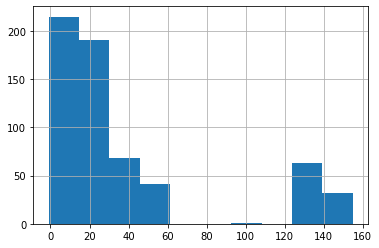

In [12]:
df.Age.hist()

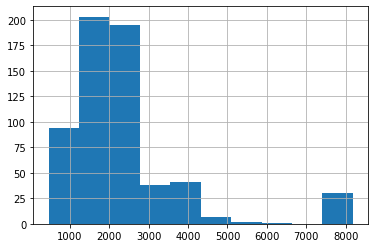

In [13]:
df.desc_len.hist()

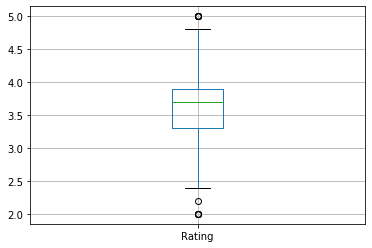

In [14]:
df.boxplot(column = 'Rating')

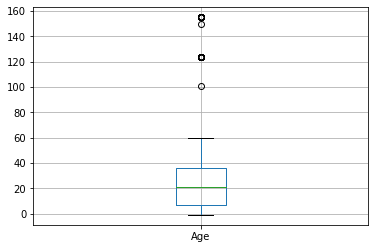

In [15]:
df.boxplot(column = 'Age')

In [21]:
df[['Rating','Age','desc_len','Founded']].corr()

,Rating,Age,desc_len,Founded
Rating,1.000000,0.290496,0.251361,0.138922
Age,0.290496,1.000000,0.613640,0.398557
desc_len,0.251361,0.613640,1.000000,0.070549
Founded,0.138922,0.398557,0.070549,1.000000


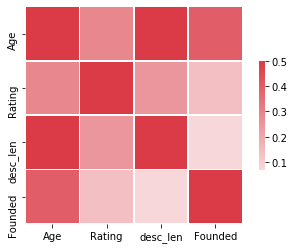

In [35]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Age','Rating','desc_len','Founded']].corr(),vmax=.5, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
df_cat = df[['Company Name', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 
    'Revenue','python_yn', 'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn']]

Graph for Company Name: total = 66


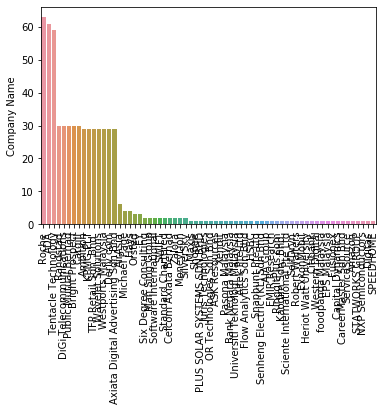

Graph for Location: total = 7


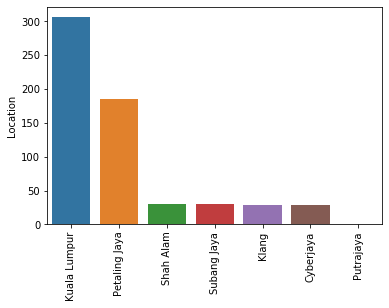

Graph for Size: total = 7


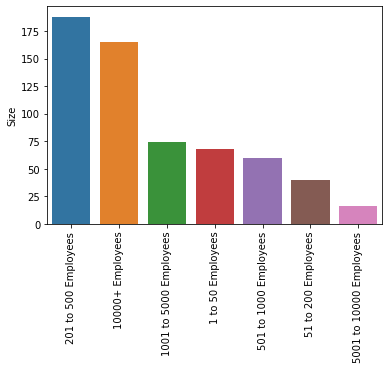

Graph for Type of ownership: total = 6


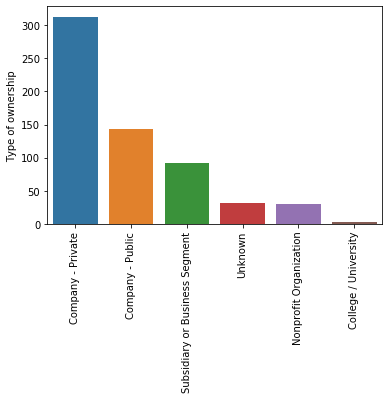

Graph for Industry: total = 24


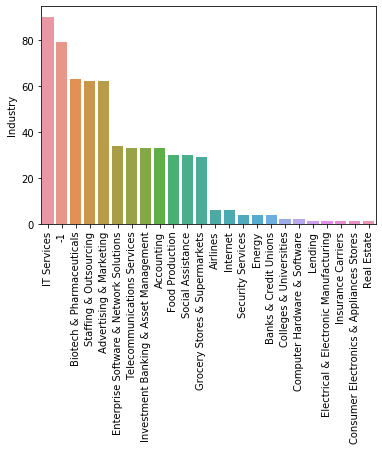

Graph for Sector: total = 16


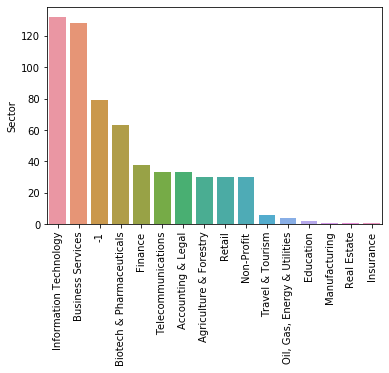

Graph for Revenue: total = 13


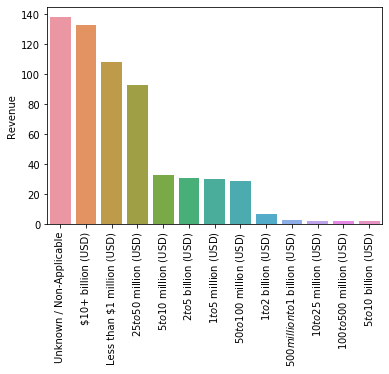

Graph for python_yn: total = 2


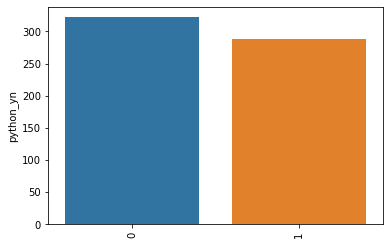

Graph for sql_yn: total = 2


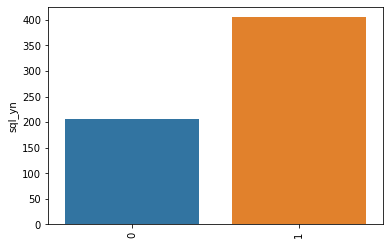

Graph for tableau_yn: total = 2


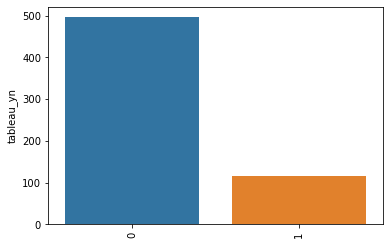

Graph for spark_yn: total = 2


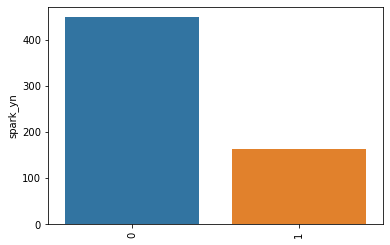

Graph for aws_yn: total = 2


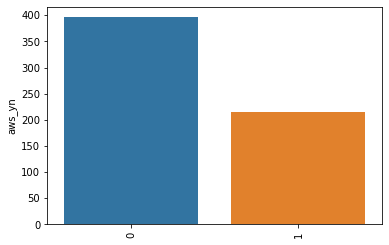

Graph for excel_yn: total = 2


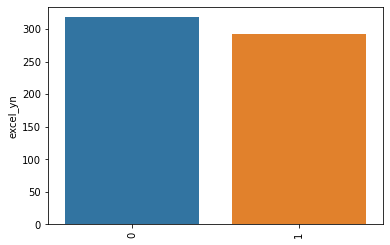

In [43]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i,len(cat_num)))
    cat=sns.barplot(x=cat_num.index,y=cat_num)
    cat.set_xticklabels(cat.get_xticklabels(), rotation=90)
    plt.show()

Graph for Company Name: total = 20


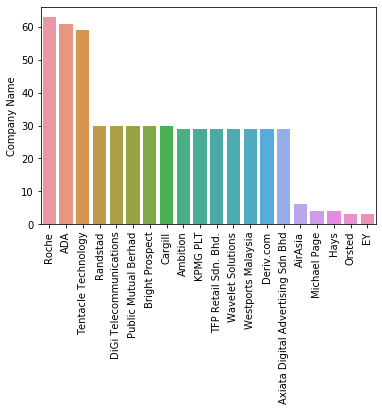

Graph for Location: total = 7


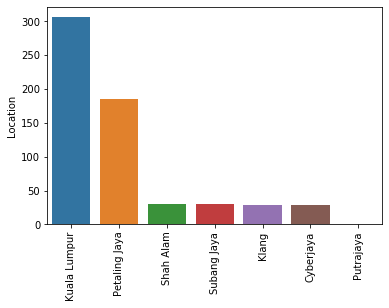

Graph for Size: total = 7


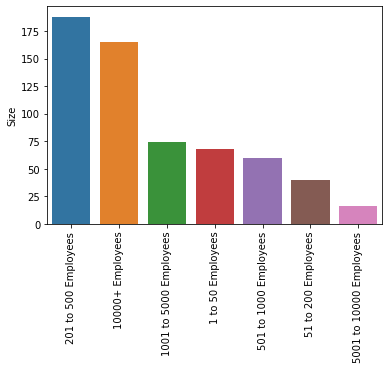

Graph for Revenue: total = 13


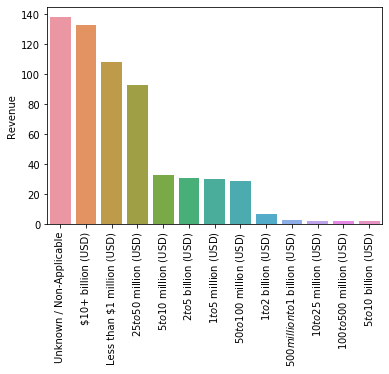

In [48]:
for i in df_cat[['Company Name','Location','Size','Revenue']].columns:
    cat_num=df_cat[i].value_counts()[:20] #taking only the first 20 categories
    print("Graph for %s: total = %d" % (i,len(cat_num)))
    cat=sns.barplot(x=cat_num.index,y=cat_num)
    cat.set_xticklabels(cat.get_xticklabels(), rotation=90)
    plt.show()

In [49]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Age', 'python_yn', 'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [51]:
pd.pivot_table(df,index='job_simp',values='Rating')

,Rating
job_simp,
analyst,3.565198
data engineer,3.687417
data scientist,3.628125
director,3.500000
manager,3.950000
mle,3.400000
na,3.914634


In [53]:
pd.pivot_table(df,index=['job_simp','seniority'],values='Rating')

Rating
job_simp       seniority          
analyst        na         3.578049
               senior     3.531746
data engineer  na         3.625414
               senior     3.780165
data scientist jr         2.900000
               na         3.676190
               senior     3.600000
director       na         3.500000
manager        na         3.980000
               senior     3.800000
mle            senior     3.400000
na             na         3.934286
               senior     3.800000

In [55]:
pd.pivot_table(df,index=['Location','job_simp'],values='Rating').sort_values('Rating', ascending = False)

Rating
Location      job_simp                
Cyberjaya     data engineer   4.400000
Petaling Jaya data engineer   4.100000
Kuala Lumpur  na              3.980000
              manager         3.950000
Shah Alam     na              3.900000
              data scientist  3.900000
Putrajaya     na              3.900000
Subang Jaya   data scientist  3.900000
Petaling Jaya na              3.800000
Kuala Lumpur  data engineer   3.666822
              data scientist  3.650000
              analyst         3.631915
Klang         analyst         3.600000
Petaling Jaya analyst         3.537748
Kuala Lumpur  director        3.500000
              mle             3.400000
Petaling Jaya data scientist  3.166667
Subang Jaya   data engineer   2.700000

In [57]:
pd.pivot_table(df,index='Revenue',values='Rating').sort_values('Rating', ascending = False)

,Rating
Revenue,
Unknown / Non-Applicable,3.986957
$10+ billion (USD),3.950376
$5 to $10 million (USD),3.881818
$10 to $25 million (USD),3.800000
$2 to $5 billion (USD),3.800000
$5 to $10 billion (USD),3.700000
$1 to $2 billion (USD),3.642857
$50 to $100 million (USD),3.600000
$100 to $500 million (USD),3.500000


In [59]:
pd.pivot_table(df,index=['Location','job_simp'],values='Rating', aggfunc = 'count').sort_values('Rating', ascending = False)

,,Rating
Location,job_simp,
Kuala Lumpur,data engineer,214
Petaling Jaya,analyst,151
Kuala Lumpur,analyst,47
Petaling Jaya,data engineer,30
Klang,analyst,29
Subang Jaya,data engineer,29
Cyberjaya,data engineer,29
Shah Alam,na,28
Kuala Lumpur,data scientist,26


In [60]:
pd.pivot_table(df[df.job_simp == 'data scientist'],index='Location',values='Rating').sort_values('Rating', ascending = False)

,Rating
Location,
Shah Alam,3.900000
Subang Jaya,3.900000
Kuala Lumpur,3.650000
Petaling Jaya,3.166667


In [61]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Age', 'python_yn', 'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [62]:
#rating x industry
#rating x sector
#rating x revenue
#rating x python
#rating x sql
#rating x tableau
#rating x spark
#rating x aws
#rating x excel
#rating x desc_len
#rating x Type of ownership

In [77]:
df_pivots = df[['Industry', 'Sector', 'Revenue', 'Type of ownership', 'python_yn', 'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Rating']]

In [78]:
df_pivots

,Industry,Sector,Revenue,Type of ownership,python_yn,sql_yn,tableau_yn,spark_yn,aws_yn,excel_yn,Rating
0,Enterprise Software & Network Solutions,Information Technology,$5 to $10 million (USD),Company - Private,1,1,0,0,0,0,2.9
1,Accounting,Accounting & Legal,$10+ billion (USD),Company - Private,1,1,1,0,0,1,3.8
2,Computer Hardware & Software,Information Technology,$10+ billion (USD),Company - Public,1,1,0,0,1,0,3.5
3,Internet,Information Technology,Unknown / Non-Applicable,Company - Private,1,1,1,0,0,1,4.0
4,-1,-1,Less than $1 million (USD),Company - Private,1,1,0,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
606,Staffing & Outsourcing,Business Services,$10+ billion (USD),Company - Public,1,0,0,0,0,1,3.7
607,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),Company - Public,0,1,1,0,0,0,4.1
608,Investment Banking & Asset Management,Finance,Less than $1 million (USD),Subsidiary or Business Segment,0,1,0,0,0,0,3.9
609,Food Production,Agriculture & Forestry,$10+ billion (USD),Company - Private,0,0,1,0,1,1,3.9


In [79]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'Rating').sort_values('Rating', ascending = False))

Industry
                                            Rating
Industry                                          
Real Estate                               4.700000
Grocery Stores & Supermarkets             4.400000
Energy                                    4.100000
Colleges & Universities                   4.100000
Biotech & Pharmaceuticals                 4.098413
Internet                                  4.033333
Telecommunications Services               3.909091
Food Production                           3.900000
Lending                                   3.900000
Investment Banking & Asset Management     3.842424
Electrical & Electronic Manufacturing     3.800000
Accounting                                3.800000
Advertising & Marketing                   3.693548
IT Services                               3.661111
Staffing & Outsourcing                    3.648387
Banks & Credit Unions                     3.600000
Insurance Carriers                        3.600000
Airlines              

ValueError: Grouper for 'Rating' not 1-dimensional

In [80]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'Rating', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),3.0,4.0
$1 to $5 million (USD),30.0,NaN
$10 to $25 million (USD),1.0,1.0
$10+ billion (USD),65.0,68.0
$100 to $500 million (USD),1.0,1.0
$2 to $5 billion (USD),31.0,NaN
$25 to $50 million (USD),1.0,92.0
$5 to $10 billion (USD),1.0,1.0
$5 to $10 million (USD),28.0,5.0


In [87]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

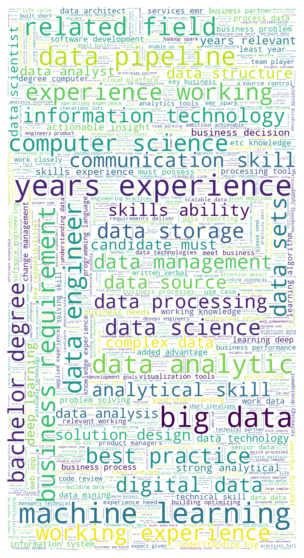

In [90]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()